Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<div class="alert alert-block alert-info">
<b>Цель проекта:</b> необходимо решить, где бурить новую скважину.

<b>Входные данные:</b> пробы нефти в трех регионах: в каждом 10000 месторождений.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st
from random import randint
random_state = 12345
import warnings

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

## Загрузка и подготовка данных

In [2]:
geo_data1 = pd.read_csv("/datasets/geo_data_0.csv")
geo_data2 = pd.read_csv("/datasets/geo_data_1.csv")
geo_data3 = pd.read_csv("/datasets/geo_data_2.csv")

In [3]:
print(geo_data1.info())
print(geo_data2.info())
print(geo_data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

In [4]:
print(geo_data1.head())
print(geo_data2.head())
print(geo_data3.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [5]:
#Проверим данные на пропуски
print(geo_data1.isna().sum())
print(geo_data2.isna().sum())
print(geo_data3.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>
<hr>  

Пропуски не обнаружены

</div>

In [6]:
#Проверим данные на наличие явных дубликатов
print(geo_data1.duplicated().sum())
print(geo_data2.duplicated().sum())
print(geo_data3.duplicated().sum())

0
0
0


<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>
<hr>  

Дубликаты не выявлены

</div>

In [7]:
#Методом describe исследуем данные 
print(geo_data1.describe())
print(geo_data2.describe())
print(geo_data3.describe())

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%       

<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>
<hr>  

Методом describe можно проанализировать, как распределены данные (количественные признаки), а также можно выявить аномалии. 

Для признаков f0, f1, f2 средние примерно равны медианам, что говорит о том, что значения большинства объектов для этих признаков тяготеют к среднему. Сложно говорить об аномалиях, поскольку нам неизвестно, что данные признаки означают.
    
Если говорить об объемах запасов в скважине, ситуация аналогичная. Для трех регионов среднее примерно равно медиане.    


</div>

In [8]:
#Выделим признаки и целевой признак
features1 = geo_data1.drop(['id','product'], axis=1)
target1 = geo_data1['product']
features2 = geo_data2.drop(['id', 'product'], axis=1)
target2 = geo_data2['product']
features3 = geo_data3.drop(['id', 'product'], axis=1)
target3 = geo_data3['product']

<div class="alert alert-info">
Поскольку id - неинформативный признак, его вместе с целевым удалим для features.

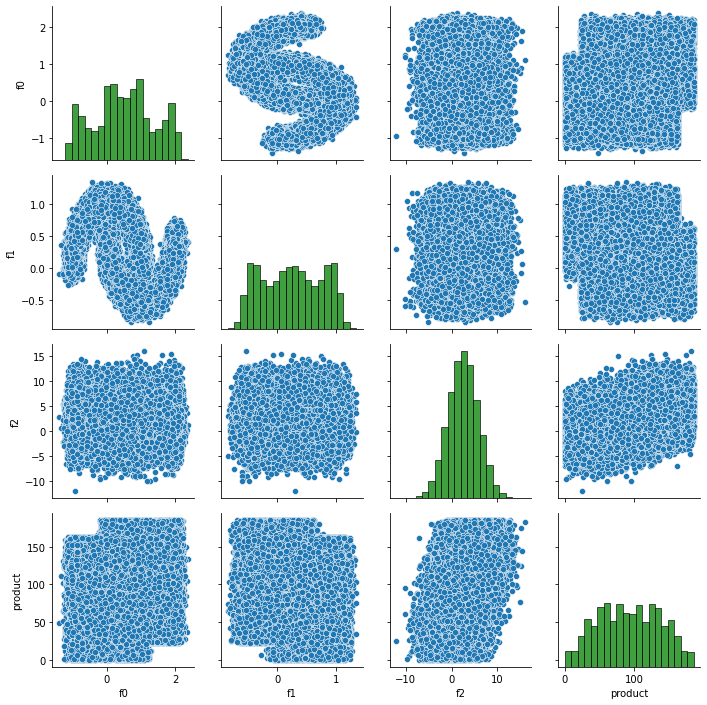

In [9]:
#Посмотрим на зависимость между всеми признаками, в том числе и целевым, а также на распределения признаков
g1 = sns.PairGrid(geo_data1)
g1.map_diag(sns.histplot, bins=20, color="green")
g1.map_offdiag(sns.scatterplot)

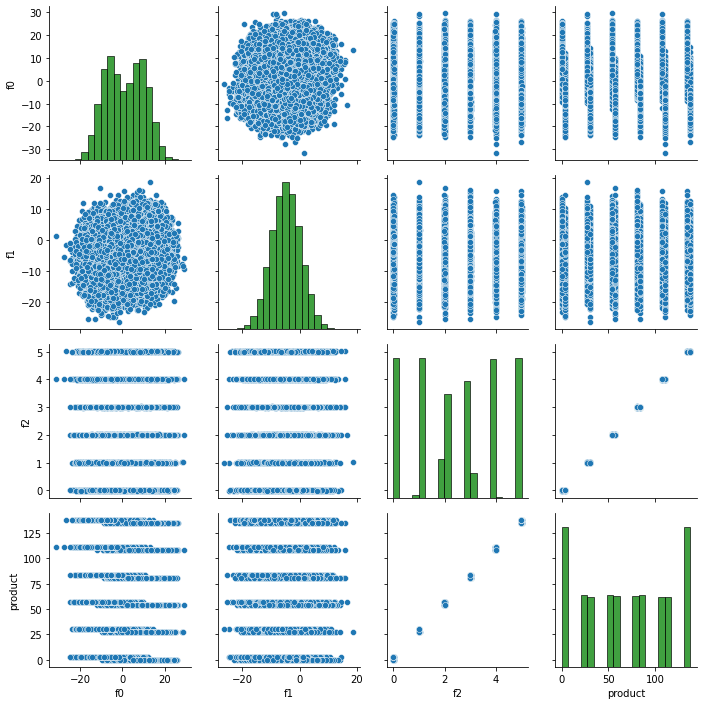

In [10]:
g2 = sns.PairGrid(geo_data2)
g2.map_diag(sns.histplot, bins=20, color="green")
g2.map_offdiag(sns.scatterplot)


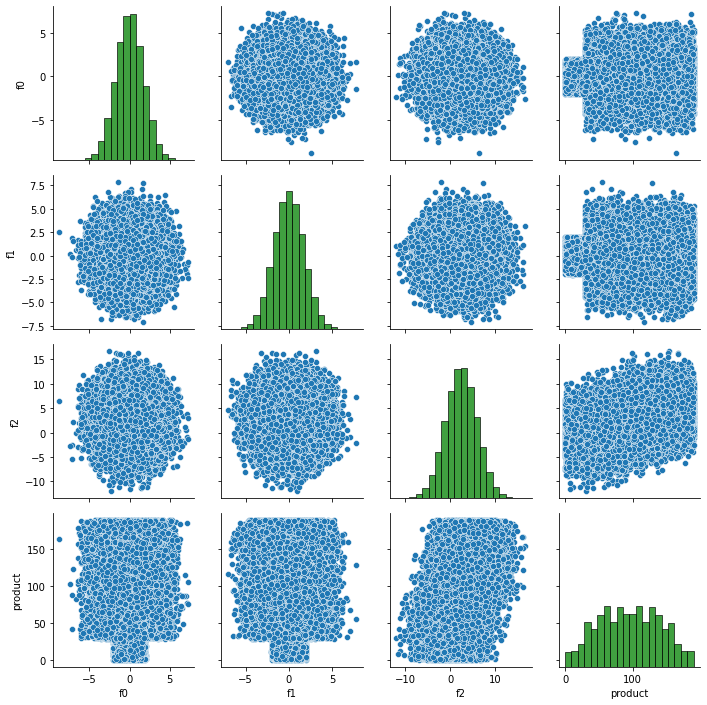

In [11]:
g3 = sns.PairGrid(geo_data3)
g3.map_diag(sns.histplot, bins=20, color="green")
g3.map_offdiag(sns.scatterplot)

<div class="alert alert-info">
<h2> Вывод<a class="tocSkip"></h2>
<hr>  
Судя по графикам, зависимость между признаками для трех регионов не выявлена. Все признаки важны и их необходимо оставить для построения прогноза. Однако, была выявления прямая линейная зависимость для второго региона между признаком f2 и объемом запасов в скважине. Возможно это как-тог повлияет на результаты предсказаний. 
    
Также распределение целевого признака во втором регионе сильно отличается от распределений целевых признаков первого и третьего региона: пристутствует много значения с очень низким и очень высоким объёмом запасов.
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Согласен, что колонка id нам не нужна. Радует, что распределения были визуализированы.
</div>

## Обучение и проверка модели

In [12]:
#Разделим данные на обучающую и валидационную выборки
x_train1, x_valid1, y_train1, y_valid1 = train_test_split(features1, target1, test_size=0.25, random_state=random_state)
x_train2, x_valid2, y_train2, y_valid2 = train_test_split(features2, target2, test_size=0.25, random_state=random_state)
x_train3, x_valid3, y_train3, y_valid3 = train_test_split(features3, target3, test_size=0.25, random_state=random_state)

In [13]:
#Масштабируем признаки
scaler = StandardScaler()
scaler.fit(x_train1)
x_train1 = pd.DataFrame(scaler.transform(x_train1))
scaler.fit(x_valid1)
x_valid1 = pd.DataFrame(scaler.transform(x_valid1))
scaler.fit(x_train2)
x_train2 = pd.DataFrame(scaler.transform(x_train2))
scaler.fit(x_valid2)
x_valid2 = pd.DataFrame(scaler.transform(x_valid2))
scaler.fit(x_train3)
x_train3 = pd.DataFrame(scaler.transform(x_train3))
scaler.fit(x_valid3)
x_valid3 = pd.DataFrame(scaler.transform(x_valid3))

In [14]:
#Создаем функцию для подбора параметров с помощью GridSearchCV
def selection(model, parameters, x_train, y_train):
    clf = GridSearchCV(model, parameters, verbose=1)
    clf.fit(x_train1, y_train1)
    return(clf.best_params_)
warnings.filterwarnings('ignore')    

In [15]:
#Передаем нужные параметры, модель линейной регрессии и обучающие данные для каждого региона в функцию для подбора параметров по GridSearchCV
parameters = {
    "fit_intercept": ["bool", True, False],
    "normalize": ["bool", True, False]
}
print("Наилучшие параметры для модели линейной регрессии для первого региона:", selection(LinearRegression(), parameters, x_train1, y_train1))
print("Наилучшие параметры для модели линейной регрессии для второго региона:", selection(LinearRegression(), parameters, x_train2, y_train2))
print("Наилучшие параметры для модели линейной регрессии для второго региона:", selection(LinearRegression(), parameters, x_train3, y_train3))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Наилучшие параметры для модели линейной регрессии для первого региона: {'fit_intercept': 'bool', 'normalize': 'bool'}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Наилучшие параметры для модели линейной регрессии для второго региона: {'fit_intercept': 'bool', 'normalize': 'bool'}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Наилучшие параметры для модели линейной регрессии для второго региона: {'fit_intercept': 'bool', 'normalize': 'bool'}


<div class="alert alert-info">
<h2> Вопрос студента<a class="tocSkip"></h2>
<hr>  
Почему при подборе параметров при помощи GridSearchCV по разным данным трех регионов подбираются для каждого региона одни и те же параметры?
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> В случае линейной модели эти параметры практически ни на что не влияют. Можно сказать, что это модель без параметров.
</div>

In [16]:
model_regression = LinearRegression(fit_intercept=bool, normalize=bool)
model_regression.fit(x_train1, y_train1)
print("R2:", model_regression.score(x_valid1, y_valid1))
predictions_regression1 = model_regression.predict(x_valid1)
print("RMSE:", mean_squared_error(y_valid1, predictions_regression1) ** 0.5)

R2: 0.2799168602422424
RMSE: 37.58010943632562


In [17]:
model_regression.fit(x_train2, y_train2)
print("R2:", model_regression.score(x_valid2, y_valid2))
predictions_regression2 = model_regression.predict(x_valid2)
print("RMSE:", mean_squared_error(y_valid2, predictions_regression2) ** 0.5)

R2: 0.9996088680806561
RMSE: 0.9101647093055439


<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>
<hr>  
Модель показала очень высокое качество на валидационной выборке, необходимо удостовериться нет ли проблемы недообучения или переобучения. Посмотрим на качество предсказаний на обучающей выборке. 
</div>

In [18]:
predictions = model_regression.predict(x_train2)
print("R2:", model_regression.score(x_train2, y_train2))
print("RMSE:", mean_squared_error(y_train2, predictions) ** 0.5)

R2: 0.9996247760326118
RMSE: 0.8894720773917386


<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>
<hr>  
На train и valid качество примерно одинаковое. Значит проблем переобучения или недообучения нет. 
</div>

In [19]:
model_regression.fit(x_train3, y_train3)
print("R2:", model_regression.score(x_valid3, y_valid3))
predictions_regression3 = model_regression.predict(x_valid3)
print("RMSE:", mean_squared_error(y_valid3, predictions_regression3) ** 0.5)

R2: 0.20522161202379663
RMSE: 40.0303627970992


In [20]:
#Напечатаем средний запас предсказанного сырья для каждого региона
print("Средний запас предсказанного сырья для region1:", predictions_regression1.mean())
print("Средний запас предсказанного сырья для region2:", predictions_regression2.mean())
print("Средний запас предсказанного сырья для region3:", predictions_regression3.mean())

Средний запас предсказанного сырья для region1: 92.64046775305692
Средний запас предсказанного сырья для region2: 68.85895465854666
Средний запас предсказанного сырья для region3: 95.03858906371521


<AxesSubplot:>

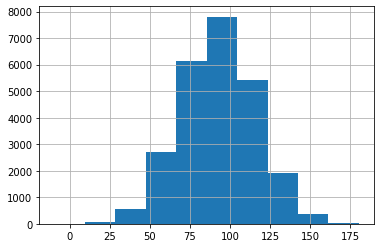

In [21]:
#Посмотрим на распределения предсказаний для каждого региона
pd.Series(predictions_regression1).hist()

<AxesSubplot:>

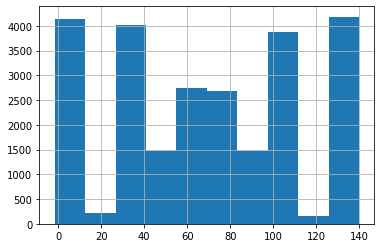

In [22]:
pd.Series(predictions_regression2).hist()

<AxesSubplot:>

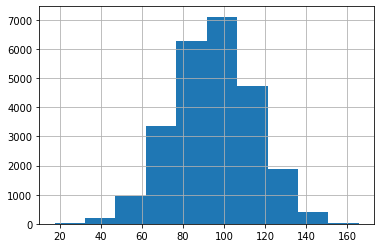

In [23]:
pd.Series(predictions_regression3).hist()

<div class="alert alert-info">
<h2>Вывод<a class="tocSkip"></h2>
<hr> 
RMSE для первого и третьего региона достаточно высокое, что говорит о том, что предсказания не очень хорошие. Для второго региона RMSE модели очень низкое, а коэффициент детерминации практически равен 1, эта модель предсказывает запасы сырья очень хорошо, возможно это связано с наличием прямой линейной заивсимости между признаком f2 и целевым признаком.
    
    
Средний запас предсказанного сырья для второго региона значительно ниже, чем для первого и третьего. Это связано с распределение предсказаний: в первом и третьем регионе оно близко к нормальному, во втором регионе-присутствует много показателей с низким и высоким значением.
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> На протяжении всего проекта происходит работа с 3мя одинаковыми таблицами. В связи с этим можно было использовать функции и/или циклы, чтобы избежать копирования кода.
<br> Зачем его нужно избегать? Потому что очень часто оно приводит к ошибкам (например, забыл поменять одну из переменных). Впоследствии такие ошибки очень трудно найти.
</div>

## Подготовка к расчёту прибыли

In [37]:
BUDGET = 10e9
MATERIAL_INCOME = 450e3
WELLS_NUMBER = 200

In [38]:
break_even_volume = budget / material_income / wells_number
print(f"Достаточный объём сырья для безубыточной разработки новой скважины: {round(break_even_volume,1)}, тыс. баррелей")

Достаточный объём сырья для безубыточной разработки новой скважины: 111.1, тыс. баррелей


<div class="alert alert-info">
<h2>Вывод<a class="tocSkip"></h2>
<hr> 
Достаточный объём сырья выше, чем средний предсказанный объём сырья для трех регионов, но он ближе к среднему первого и третьего региона. Однако качество предсказания моделей для первого и третьего региона значительно ниже, чем для второго.
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Спасибо!
</div>

## Расчёт прибыли и рисков 

In [111]:
#Функция для расчета прибыли
def profit(predictions, y_valid):
    predictions = pd.Series(predictions).sort_values(ascending=False)
    best_predictions = predictions[:200]
    indexes = list(best_predictions.index)
    y_valid = y_valid.reset_index(drop=True)
    sum_best_values = y_valid.loc[indexes].sum()
    profit = sum_best_values * MATERIAL_INCOME - BUDGET
    return profit  

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Для выбора 200 лучших скважин нужно использовать предсказанные значения. А вот для подсчета прибыли должны использоваться настоящие значения соответствующих ячеек.
</div>

In [112]:
print(f"Прибыль для полученного объёма сырья для первого региона: {round(profit(predictions_regression1, y_valid1), 1)}, рублей")
print(f"Прибыль для полученного объёма сырья для второго региона: {round(profit(predictions_regression2, y_valid2), 2)}, рублей")
print(f"Прибыль для полученного объёма сырья для третьего региона: {round(profit(predictions_regression3, y_valid3),3)}, рублей")

Прибыль для полученного объёма сырья для первого региона: 3320826043.1, рублей
Прибыль для полученного объёма сырья для второго региона: 2415086696.68, рублей
Прибыль для полученного объёма сырья для третьего региона: 2710349963.6, рублей


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Исправила.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Верно!
</div>

In [131]:
#Техника Bootstrap. 1000 раз формируем выборки по 500 значений из полученных предсказаний для каждого региона(объем массива с предсказаниями-25000)
state = np.random.RandomState(12345)
def bootstrap(predictions, y_valid, num):
    
    values = []
    count = 0
    
    predictions = pd.Series(predictions)
    for i in range(1000):
        subsample = predictions.sample(n=500, random_state=state)
        values.append(profit(subsample, y_valid))
    
    values = pd.Series(values)
    
    upper = values.quantile(0.975)
    lower = values.quantile(0.025)  

    print(f"Средняя прибыль для {num} региона:", round(values.mean(), 1))
    print(f"95%-й доверительный интервал для {num} региона-нижняя граница: {lower}, верхняя граница: {upper}")
    print(f"Риск убытков для {num} региона: {round((values < 0).mean() * 100, 3)}%")

<div class="alert alert-info">
<h2> Вопрос студента<a class="tocSkip"></h2>
<hr>  
Могу ли я доверительный интервал рассчитывать таким образом? Или необходимо использовать values.quantile()?
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Для подсчета доверительного интервала стоит использовать метод квантилей, так как мы реализуем технику бутстрап.
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> Лучше было бы сделать так `.sample(n=500, ...)`.
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> Риск можно было найти чуть проще: `(values < 0).mean()`, если объект типа pandas Series или numpy array.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Исправила.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Отлично!
</div>

In [132]:
bootstrap(predictions_regression1, y_valid1, 1)

Средняя прибыль для 1 региона: 380183691.8
95%-й доверительный интервал для 1 региона-нижняя граница: -124721539.15867047, верхняя граница: 879613967.8477976
Риск убытков для 1 региона: 7.0%


In [133]:
bootstrap(predictions_regression2, y_valid2, 2)

Средняя прибыль для 2 региона: 454782573.6
95%-й доверительный интервал для 2 региона-нижняя граница: 46730084.769206285, верхняя граница: 840213356.26002
Риск убытков для 2 региона: 1.3%


In [134]:
bootstrap(predictions_regression3, y_valid3, 3)

Средняя прибыль для 3 региона: 389194478.6
95%-й доверительный интервал для 3 региона-нижняя граница: -115609565.77767342, верхняя граница: 906512590.1730093
Риск убытков для 3 региона: 7.3%


<div class="alert alert-block alert-info">

<b>Совет: </b> Кажется, что интервал отрицательный (но это тире), лучше поменять.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Исправила.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> ОК.
</div>

<div class="alert alert-info">
<h2> Общий вывод<a class="tocSkip"></h2>
<hr>  
Риски убытков высокие для первого и второго регионов, а также прибыль в этих регионах ниже, чем во втором. Поэтому второй регион предлагается для разработки месторождения. 
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Вывод исправила.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> В выводе есть опечатка в названии регионов.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован